In [11]:
from datetime import datetime, timedelta
from offres_emploi.utils import dt_to_str_iso
from datetime import datetime, timedelta
from offres_emploi import Api
from itertools import count



def rechercher_offres_emploi(mots_cles, mot_cle_repli="dev_web"):
    client = Api(
        client_id="PAR_bottwiiter_6253422b7e25285a1895dc28fcf76733f93ca17cad6a9e0aca8c9de42a8364c0",
        client_secret="b8f09d357980a24a9b4869081a8d28471a868fae7aa148364ecbf7d9c539a78a",
    )
    # mots_cles = mots_cles[:2]
    # st.write(mots_cles)

    start_dt = datetime.now() - timedelta(days=7)
    end_dt = datetime.now()
    params_base = {
        "minCreationDate": dt_to_str_iso(start_dt),
        "maxCreationDate": dt_to_str_iso(end_dt),
    }

    resultats_totaux = []
    mots_cles_effectues = 0

    tous_mots_cles = mots_cles + [mot_cle_repli]

    for mot_cle in mots_cles + [mot_cle_repli]:
        if mots_cles_effectues >= 3:  # Si 3 mots clés ont déjà réussi, on arrête.
            break

        else:
            try:
                params = params_base.copy()
                params["motsCles"] = mot_cle
                resultats_recherche = client.search(params=params)
                if resultats_recherche.get("resultats"):
                    resultats_totaux.extend(resultats_recherche["resultats"])
                mots_cles_effectues += 1
            except Exception as e:
                print(f"Erreur lors de la recherche pour le mot-clé '{mot_cle}': {e}")

    # Dédoublonner les offres avec gestion des clés manquantes
    offres_uniques = {}
    for offre in resultats_totaux:
        # Utiliser des valeurs par défaut si les clés sont manquantes
        libelle = offre.get("libelle", "Libellé non spécifié")
        nom_entreprise = offre.get("entreprise", {}).get(
            "nom", "Entreprise non spécifiée"
        )
        lieu_travail = offre.get("lieuTravail", {}).get(
            "libelle", "Lieu de travail non spécifié"
        )

        cle_unique = (libelle, nom_entreprise, lieu_travail)

        if cle_unique not in offres_uniques:
            offres_uniques[cle_unique] = offre

    # Attribuer un ID unique à chaque offre
    offres_avec_id = []
    unique_id_generator = count(start=1)  # Génère des ID uniques à partir de 1
    for offre in offres_uniques.values():
        offre_id = next(unique_id_generator)
        offre["id_unique"] = offre_id
        offres_avec_id.append(offre)

    return offres_avec_id

In [4]:
%run lst_fction.py

2024-04-22 12:14:43.880 
  command:

    streamlit run lst_fction.py [ARGUMENTS]
No sentence-transformers model found with name /Users/tuyindig/.cache/torch/sentence_transformers/dangvantuan_sentence-camembert-large. Creating a new one with MEAN pooling.


In [27]:
def job_analysis(jobname):
    """
    Analyze job offers based on the specified job name.
    
    Args:
    jobname (str): The name of the job to analyze.
    
    Returns:
    list: A list of parsed job descriptions that match the job name.
    """
    result_list = []
    list_of_results = rechercher_offres_emploi([jobname])  # Assuming it accepts a list of keywords
    
    for job in list_of_results:
        print(job)  # Assuming you want to see what's being processed, else remove this line.
        if jobname.lower() in job['intitule'].lower(): 
            print(job['description']) # Case insensitive matching
            result = parsing_joboffer(job['description'])
            print(result)
            result_list.append(result)
            return result_list

In [28]:
job_analysis ('data')

{'id': '173HWCH', 'intitule': 'Data Scientist Traitement du Langage Naturel H/F (H/F)', 'description': "Créée en 1997, Acelys Services Numériques est la 1ère DFS (Digital Factory Services) de la Région qui propose à ses clients des services industrialisés de développement et d'intégration à haute valeur ajoutée de solutions numériques.\n\nEn particulier sur les domaines : \n\n- Du développement logiciel & mobile ;\n- De la Business Intelligence & la Data Science ;\n- De l'intégration des solutions de dématérialisation ;\n- De la cybersécurité et des infrastructures\n- De l'innovation R&D et l'édition de logiciels. \n\nDepuis 2017, Acelys confirme sa maîtrise de la sécurité de son système de management de la sécurité de l'information avec la certification ISO 27001 !\n\nBasé à Montpellier, au sein du dynamique Pôle Eureka, notre centre abrite près de 70% de nos collaborateurs. Notre histoire solide, notre indépendance, et notre présence régionale font de nous un pilier de l'innovation n

/Users/tuyindig/Documents/Nest_app/nest-app/venv/lib/python3.10/site-packages/simpletransformers/ner/ner_model.py:419: UserWarning: use_multiprocessing automatically disabled as CamemBERT fails when using multiprocessing for feature conversion.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/13 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [2]:
rechercher_offres_emploi(['data scientist'], mot_cle_repli="dev_web")
 

[{'id': '173HWCH',
  'intitule': 'Data Scientist Traitement du Langage Naturel H/F (H/F)',
  'description': "Créée en 1997, Acelys Services Numériques est la 1ère DFS (Digital Factory Services) de la Région qui propose à ses clients des services industrialisés de développement et d'intégration à haute valeur ajoutée de solutions numériques.\n\nEn particulier sur les domaines : \n\n- Du développement logiciel & mobile ;\n- De la Business Intelligence & la Data Science ;\n- De l'intégration des solutions de dématérialisation ;\n- De la cybersécurité et des infrastructures\n- De l'innovation R&D et l'édition de logiciels. \n\nDepuis 2017, Acelys confirme sa maîtrise de la sécurité de son système de management de la sécurité de l'information avec la certification ISO 27001 !\n\nBasé à Montpellier, au sein du dynamique Pôle Eureka, notre centre abrite près de 70% de nos collaborateurs. Notre histoire solide, notre indépendance, et notre présence régionale font de nous un pilier de l'innovat

In [10]:
file=pd.read_csv('elections-france-presidentielles-2022-1er-tour-par-bureau-de-vote.csv',sep=';')

/var/folders/nh/yycxdg3j4zv38d785_zjzr0r0000gn/T/ipykernel_58392/234896327.py:1: DtypeWarning: Columns (0,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  file=pd.read_csv('elections-france-presidentielles-2022-1er-tour-par-bureau-de-vote.csv',sep=';')


In [13]:
file.columns

Index(['Code du département', 'Libellé du département',
       'Code de la circonscription', 'Libellé de la circonscription',
       'Code de la commune', 'Libellé de la commune', 'Code du b.vote',
       'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins',
       'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins',
       '% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot', 'N°Panneau', 'Sexe',
       'Nom', 'Prénom', 'Voix', '% Voix/Ins', '% Voix/Exp',
       'Code Officiel EPCI', 'Nom Officiel EPCI', 'Code Officiel Région',
       'Nom Officiel Région', 'scrutin_code', 'location', 'lib_du_b_vote'],
      dtype='object')

In [16]:
# Étape 2 : Filtrer les données
df_filtered = file[file['Libellé de la commune'] == 'Valenciennes']

In [40]:
df_valenciennes = file[file['Libellé de la commune'] == 'Valenciennes']

# Etape 3: Filtrer par Nom
df_melenchon = df_valenciennes[df_valenciennes['Nom'] == 'MÉLENCHON']
len(df_melenchon)


23

In [50]:
df_melenchon

,Code du département,Libellé du département,Code de la circonscription,Libellé de la circonscription,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot,N°Panneau,Sexe,Nom,Prénom,Voix,% Voix/Ins,% Voix/Exp,Code Officiel EPCI,Nom Officiel EPCI,Code Officiel Région,Nom Officiel Région,scrutin_code,location,lib_du_b_vote
6415,59,Nord,21,21ème circonscription,59606,Valenciennes,20,1246,426,34.19,820,65.81,9,0.72,1.10,1,0.08,0.12,810,65.01,98.78,7,M,MÉLENCHON,Jean-Luc,187,15.01,"23,09",245901160.0,CA Valenciennes Métropole,32.0,Hauts-de-France,PR2022,"50.364238, 3.488094",GROUPE SCOLAIRE JEAN MINEUR SALLE B
36767,59,Nord,21,21ème circonscription,59606,Valenciennes,23,1099,396,36.03,703,63.97,9,0.82,1.28,6,0.55,0.85,688,62.60,97.87,7,M,MÉLENCHON,Jean-Luc,198,18.02,"28,78",245901160.0,CA Valenciennes Métropole,32.0,Hauts-de-France,PR2022,"50.359527, 3.482838",ECOLE EMILE ZOLA
55566,59,Nord,21,21ème circonscription,59606,Valenciennes,4,1129,257,22.76,872,77.24,12,1.06,1.38,6,0.53,0.69,854,75.64,97.94,7,M,MÉLENCHON,Jean-Luc,153,13.55,"17,92",245901160.0,CA Valenciennes Métropole,32.0,Hauts-de-France,PR2022,"50.358955, 3.528526",ECOLE MATHIEU DE QUINVIGNIES
55582,59,Nord,21,21ème circonscription,59606,Valenciennes,14,1225,340,27.76,885,72.24,13,1.06,1.47,1,0.08,0.11,871,71.10,98.42,7,M,MÉLENCHON,Jean-Luc,154,12.57,"17,68",245901160.0,CA Valenciennes Métropole,32.0,Hauts-de-France,PR2022,"50.359349, 3.509177",ECOLE ELEMENTAIRE ACACIAS NIVEAU 1
55602,59,Nord,21,21ème circonscription,59606,Valenciennes,22,875,268,30.63,607,69.37,8,0.91,1.32,5,0.57,0.82,594,67.89,97.86,7,M,MÉLENCHON,Jean-Luc,115,13.14,"19,36",245901160.0,CA Valenciennes Métropole,32.0,Hauts-de-France,PR2022,"50.357601, 3.494652",ECOLE SIMEON CUVEILLIER SALLE B
172547,59,Nord,21,21ème circonscription,59606,Valenciennes,17,723,271,37.48,452,62.52,3,0.41,0.66,4,0.55,0.88,445,61.55,98.45,7,M,MÉLENCHON,Jean-Luc,116,16.04,"26,07",245901160.0,CA Valenciennes Métropole,32.0,Hauts-de-France,PR2022,"50.353236, 3.488391",MAISON DU CITOYEN
191129,59,Nord,21,21ème circonscription,59606,Valenciennes,5,1507,370,24.55,1137,75.45,16,1.06,1.41,7,0.46,0.62,1114,73.92,97.98,7,M,MÉLENCHON,Jean-Luc,146,9.69,"13,11",245901160.0,CA Valenciennes Métropole,32.0,Hauts-de-France,PR2022,"50.352061, 3.525051",ECOLE JEAN BONMARCHE SALLE A
249653,59,Nord,21,21ème circonscription,59606,Valenciennes,15,821,213,25.94,608,74.06,6,0.73,0.99,3,0.37,0.49,599,72.96,98.52,7,M,MÉLENCHON,Jean-Luc,120,14.62,"20,03",245901160.0,CA Valenciennes Métropole,32.0,Hauts-de-France,PR2022,"50.350902, 3.524034",ECOLE GEORGES HUISMAN
272238,59,Nord,21,21ème circonscription,59606,Valenciennes,2,1268,274,21.61,994,78.39,16,1.26,1.61,3,0.24,0.30,975,76.89,98.09,7,M,MÉLENCHON,Jean-Luc,179,14.12,"18,36",245901160.0,CA Valenciennes Métropole,32.0,Hauts-de-France,PR2022,"50.36012, 3.534377",ECOLE PLAINE DE MONS SALLE A
327769,59,Nord,21,21ème circonscription,59606,Valenciennes,8,979,262,26.76,717,73.24,7,0.72,0.98,4,0.41,0.56,706,72.11,98.47,7,M,MÉLENCHON,Jean-Luc,195,19.92,"27,62",245901160.0,CA Valenciennes Métropole,32.0,Hauts-de-France,PR2022,"50.359896, 3.520436",ECOLE CARIOT SALLE B


In [24]:
europe=pd.read_csv('resultats-elections-europeennes-2019-bureau-de-vote.csv',sep=';')

In [26]:
europe[europe['Nom Bureau Vote']=='Ecole mixte Cuvinot']

,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Code du bureau de vote,Nombre d'inscrits,Nombre Abstention,Nombre de Votants,Nombre de Bulletins Blancs,Nombre de Bulletins Nuls,N°Liste,Nom de Liste abrégé,Nom de Liste étendu,Nom Tête de Liste,Nombre de Voix,% Voix / Nombre d'Inscrits,% Voix / Votes exprimés,Code INSEE Commune,Nom de l'EPCI,Nom de la région,Nom Bureau Vote,Coordonnées
0,59,Nord,447,Onnaing,7,946,550,396,7,10,13,PARTI FED. EUROPÉEN,PARTI FÉDÉRALISTE EUROPÉEN - POUR UNE EUROPE Q...,GERNIGON Yves,0,0.00,0.00,59447,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole mixte Cuvinot,"50.398258, 3.603739"
4,59,Nord,447,Onnaing,7,946,550,396,7,10,25,RÉVOLUTIONNAIRE,PARTI RÉVOLUTIONNAIRE COMMUNISTES,SANCHEZ Antonio,0,0.00,0.00,59447,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole mixte Cuvinot,"50.398258, 3.603739"
149,59,Nord,447,Onnaing,7,946,550,396,7,10,22,À VOIX ÉGALES,À VOIX ÉGALES,TOMASINI Nathalie,0,0.00,0.00,59447,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole mixte Cuvinot,"50.398258, 3.603739"
241,59,Nord,447,Onnaing,7,946,550,396,7,10,20,ENSEMBLE POUR LE FREXIT,ENSEMBLE POUR LE FREXIT,ASSELINEAU François,5,0.53,1.32,59447,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole mixte Cuvinot,"50.398258, 3.603739"
378,59,Nord,447,Onnaing,7,946,550,396,7,10,28,ALLIANCE JAUNE,"ALLIANCE JAUNE, LA RÉVOLTE PAR LE VOTE",LALANNE Francis,8,0.85,2.11,59447,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole mixte Cuvinot,"50.398258, 3.603739"
381,59,Nord,447,Onnaing,7,946,550,396,7,10,11,LES EUROPÉENS,LES EUROPÉENS,LAGARDE Jean-Christophe,8,0.85,2.11,59447,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole mixte Cuvinot,"50.398258, 3.603739"
390,59,Nord,447,Onnaing,7,946,550,396,7,10,24,NEUTRE ET ACTIF,NEUTRE ET ACTIF,CORBET Cathy Denise Ginette,0,0.00,0.00,59447,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole mixte Cuvinot,"50.398258, 3.603739"
467,59,Nord,447,Onnaing,7,946,550,396,7,10,23,PRENEZ LE POUVOIR,"PRENEZ LE POUVOIR, LISTE SOUTENUE PAR MARINE L...",BARDELLA Jordan,175,18.50,46.17,59447,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole mixte Cuvinot,"50.398258, 3.603739"
695,59,Nord,447,Onnaing,7,946,550,396,7,10,17,DÉCROISSANCE 2019,DÉCROISSANCE 2019,DELFEL Thérèse,0,0.00,0.00,59447,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole mixte Cuvinot,"50.398258, 3.603739"
875,59,Nord,447,Onnaing,7,946,550,396,7,10,12,ENVIE D'EUROPE,ENVIE D'EUROPE ÉCOLOGIQUE ET SOCIALE,GLUCKSMANN Raphaël,7,0.74,1.85,59447,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole mixte Cuvinot,"50.398258, 3.603739"


In [34]:
unique_bureaux = europe.drop_duplicates(subset=['Nom Bureau Vote'])

# Afficher le résultat
unique_bureaux

,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Code du bureau de vote,Nombre d'inscrits,Nombre Abstention,Nombre de Votants,Nombre de Bulletins Blancs,Nombre de Bulletins Nuls,N°Liste,Nom de Liste abrégé,Nom de Liste étendu,Nom Tête de Liste,Nombre de Voix,% Voix / Nombre d'Inscrits,% Voix / Votes exprimés,Code INSEE Commune,Nom de l'EPCI,Nom de la région,Nom Bureau Vote,Coordonnées
0,59,Nord,447,Onnaing,7,946,550,396,7,10,13,PARTI FED. EUROPÉEN,PARTI FÉDÉRALISTE EUROPÉEN - POUR UNE EUROPE Q...,GERNIGON Yves,0,0.00,0.00,59447,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole mixte Cuvinot,"50.398258, 3.603739"
1,59,Nord,215,Estreux,1,817,348,469,9,8,13,PARTI FED. EUROPÉEN,PARTI FÉDÉRALISTE EUROPÉEN - POUR UNE EUROPE Q...,GERNIGON Yves,0,0.00,0.00,59215,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Salle des fêtes,NaN
2,59,Nord,14,Anzin,6,865,513,352,6,8,14,INITIATIVE CITOYENNE,MOUVEMENT POUR L'INITIATIVE CITOYENNE,HELGEN Gilles,0,0.00,0.00,59014,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Groupe Scolaire Jean Jaurès,"50.378282, 3.519244"
3,59,Nord,383,Marly,1,1015,509,506,12,12,8,PACE,PACE - PARTI DES CITOYENS EUROPÉENS,ALEXANDRE Audric,0,0.00,0.00,59383,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Salle des Fêtes,NaN
5,59,Nord,112,Bruay-sur-l'Escaut,8,500,308,192,2,1,30,EUROPE ÉCOLOGIE,EUROPE ÉCOLOGIE,JADOT Yannick,12,2.40,6.35,59112,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Salle Goguillon,"50.387077, 3.524551"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,59,Nord,383,Marly,6,839,401,438,9,13,12,ENVIE D'EUROPE,ENVIE D'EUROPE ÉCOLOGIQUE ET SOCIALE,GLUCKSMANN Raphaël,20,2.38,4.81,59383,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole Maternelle Hurez Saint Nicolas,"50.340258, 3.561824"
325,59,Nord,616,Vieux-Condé,3,934,538,396,12,12,15,DEBOUT LA FRANCE,LE COURAGE DE DÉFENDRE LES FRANÇAIS AVEC NICOL...,DUPONT-AIGNAN Nicolas,21,2.25,5.65,59616,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole Maternelle du Centre,"50.456195, 3.568518"
331,59,Nord,480,Quérénaing,1,681,256,425,13,10,22,À VOIX ÉGALES,À VOIX ÉGALES,TOMASINI Nathalie,0,0.00,0.00,59480,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Salle Multispectacles,"50.287717, 3.512945"
370,59,Nord,606,Valenciennes,17,766,448,318,3,6,26,ESPERANTO,ESPÉRANTO - LANGUE COMMUNE ÉQUITABLE POUR L'EU...,DIEUMEGARD Pierre,0,0.00,0.00,59606,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Maison du Citoyen,"50.35319, 3.488128"


In [35]:
unique_bureaux['Taux abstention'] = (unique_bureaux['Nombre Abstention'] / unique_bureaux['Nombre d\'inscrits']) * 100
unique_bureaux

/var/folders/nh/yycxdg3j4zv38d785_zjzr0r0000gn/T/ipykernel_58392/2491664674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_bureaux['Taux abstention'] = (unique_bureaux['Nombre Abstention'] / unique_bureaux['Nombre d\'inscrits']) * 100


,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Code du bureau de vote,Nombre d'inscrits,Nombre Abstention,Nombre de Votants,Nombre de Bulletins Blancs,Nombre de Bulletins Nuls,N°Liste,Nom de Liste abrégé,Nom de Liste étendu,Nom Tête de Liste,Nombre de Voix,% Voix / Nombre d'Inscrits,% Voix / Votes exprimés,Code INSEE Commune,Nom de l'EPCI,Nom de la région,Nom Bureau Vote,Coordonnées,Taux abstention
0,59,Nord,447,Onnaing,7,946,550,396,7,10,13,PARTI FED. EUROPÉEN,PARTI FÉDÉRALISTE EUROPÉEN - POUR UNE EUROPE Q...,GERNIGON Yves,0,0.00,0.00,59447,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole mixte Cuvinot,"50.398258, 3.603739",58.139535
1,59,Nord,215,Estreux,1,817,348,469,9,8,13,PARTI FED. EUROPÉEN,PARTI FÉDÉRALISTE EUROPÉEN - POUR UNE EUROPE Q...,GERNIGON Yves,0,0.00,0.00,59215,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Salle des fêtes,NaN,42.594859
2,59,Nord,14,Anzin,6,865,513,352,6,8,14,INITIATIVE CITOYENNE,MOUVEMENT POUR L'INITIATIVE CITOYENNE,HELGEN Gilles,0,0.00,0.00,59014,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Groupe Scolaire Jean Jaurès,"50.378282, 3.519244",59.306358
3,59,Nord,383,Marly,1,1015,509,506,12,12,8,PACE,PACE - PARTI DES CITOYENS EUROPÉENS,ALEXANDRE Audric,0,0.00,0.00,59383,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Salle des Fêtes,NaN,50.147783
5,59,Nord,112,Bruay-sur-l'Escaut,8,500,308,192,2,1,30,EUROPE ÉCOLOGIE,EUROPE ÉCOLOGIE,JADOT Yannick,12,2.40,6.35,59112,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Salle Goguillon,"50.387077, 3.524551",61.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,59,Nord,383,Marly,6,839,401,438,9,13,12,ENVIE D'EUROPE,ENVIE D'EUROPE ÉCOLOGIQUE ET SOCIALE,GLUCKSMANN Raphaël,20,2.38,4.81,59383,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole Maternelle Hurez Saint Nicolas,"50.340258, 3.561824",47.794994
325,59,Nord,616,Vieux-Condé,3,934,538,396,12,12,15,DEBOUT LA FRANCE,LE COURAGE DE DÉFENDRE LES FRANÇAIS AVEC NICOL...,DUPONT-AIGNAN Nicolas,21,2.25,5.65,59616,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole Maternelle du Centre,"50.456195, 3.568518",57.601713
331,59,Nord,480,Quérénaing,1,681,256,425,13,10,22,À VOIX ÉGALES,À VOIX ÉGALES,TOMASINI Nathalie,0,0.00,0.00,59480,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Salle Multispectacles,"50.287717, 3.512945",37.591777
370,59,Nord,606,Valenciennes,17,766,448,318,3,6,26,ESPERANTO,ESPÉRANTO - LANGUE COMMUNE ÉQUITABLE POUR L'EU...,DIEUMEGARD Pierre,0,0.00,0.00,59606,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Maison du Citoyen,"50.35319, 3.488128",58.485640


In [54]:
valenciennes_bureau=unique_bureaux[unique_bureaux['Libellé de la commune']=='Valenciennes']
valenciennes_bureau

,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Code du bureau de vote,Nombre d'inscrits,Nombre Abstention,Nombre de Votants,Nombre de Bulletins Blancs,Nombre de Bulletins Nuls,N°Liste,Nom de Liste abrégé,Nom de Liste étendu,Nom Tête de Liste,Nombre de Voix,% Voix / Nombre d'Inscrits,% Voix / Votes exprimés,Code INSEE Commune,Nom de l'EPCI,Nom de la région,Nom Bureau Vote,Coordonnées,Taux abstention
29,59,Nord,606,Valenciennes,1,1008,501,507,7,5,13,PARTI FED. EUROPÉEN,PARTI FÉDÉRALISTE EUROPÉEN - POUR UNE EUROPE Q...,GERNIGON Yves,1,0.10,0.20,59606,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Hall Hôtel de Ville,"50.357825, 3.523288",49.702381
30,59,Nord,606,Valenciennes,8,907,452,455,4,10,7,ENSEMBLE PATRIOTES,ENSEMBLE PATRIOTES ET GILETS JAUNES : POUR LA ...,PHILIPPOT Florian,6,0.66,1.36,59606,CA Valenciennes Métropole,HAUTS-DE-FRANCE,"Ecole Maternelle, salle B","50.359967, 3.5205",49.834620
31,59,Nord,606,Valenciennes,19,1024,534,490,5,8,16,ALLONS ENFANTS,ALLONS ENFANTS,CAILLAUD Sophie,0,0.00,0.00,59606,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Groupe scolaire Jean Mineur,"50.364148, 3.488314",52.148438
36,59,Nord,606,Valenciennes,21,1073,588,485,17,7,26,ESPERANTO,ESPÉRANTO - LANGUE COMMUNE ÉQUITABLE POUR L'EU...,DIEUMEGARD Pierre,0,0.00,0.00,59606,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole Maternelle S. Cuveillier salle A,"50.357602, 3.494559",54.799627
55,59,Nord,606,Valenciennes,13,1148,609,539,9,9,20,ENSEMBLE POUR LE FREXIT,ENSEMBLE POUR LE FREXIT,ASSELINEAU François,6,0.52,1.15,59606,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole élementaire niveau 2,"50.358769, 3.508938",53.048780
62,59,Nord,606,Valenciennes,4,1120,521,599,12,11,22,À VOIX ÉGALES,À VOIX ÉGALES,TOMASINI Nathalie,0,0.00,0.00,59606,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole Maternelle,"50.358506, 3.528251",46.517857
101,59,Nord,606,Valenciennes,5,1478,622,856,13,11,34,EUROPE AU SERVICE PEUPLES,UNE EUROPE AU SERVICE DES PEUPLES,AZERGUI Nagib,0,0.00,0.00,59606,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole Maternelle Salle A salle de jeux,"50.351557, 3.525531",42.083897
112,59,Nord,606,Valenciennes,16,928,510,418,4,5,33,UDLEF,UDLEF (UNION DÉMOCRATIQUE POUR LA LIBERTÉ ÉGAL...,PERSON Christian Luc,0,0.00,0.00,59606,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Espace Louis Duvant,"50.35105, 3.513076",54.956897
125,59,Nord,606,Valenciennes,6,1310,551,759,8,11,24,NEUTRE ET ACTIF,NEUTRE ET ACTIF,CORBET Cathy Denise Ginette,0,0.00,0.00,59606,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole Maternelle Salle B salle de musique,"50.351557, 3.525531",42.061069
128,59,Nord,606,Valenciennes,7,1278,725,553,7,5,32,LES OUBLIES DE L'EUROPE,"LES OUBLIÉS DE L'EUROPE - ARTISANS, COMMERÇANT...",BIDOU Olivier,0,0.00,0.00,59606,CA Valenciennes Métropole,HAUTS-DE-FRANCE,"Ecole Maternelle Cariot, salle A","50.359967, 3.5205",56.729264


In [57]:
# Convertir les colonnes en minuscules pour les deux DataFrames
df_melenchon['Code du b.vote'] = df_melenchon['Code du b.vote'].astype(int)
valenciennes_bureau['Nom Bureau Vote_lower'] = valenciennes_bureau['Nom Bureau Vote'].str.lower()

# Réaliser la jointure gauche
df_joint = pd.merge(df_melenchon, valenciennes_bureau, how='left', left_on='Code du b.vote', right_on='Code du bureau de vote')

# Afficher le résultat de la jointure


/var/folders/nh/yycxdg3j4zv38d785_zjzr0r0000gn/T/ipykernel_58392/3303325279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melenchon['Code du b.vote'] = df_melenchon['Code du b.vote'].astype(int)
/var/folders/nh/yycxdg3j4zv38d785_zjzr0r0000gn/T/ipykernel_58392/3303325279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valenciennes_bureau['Nom Bureau Vote_lower'] = valenciennes_bureau['Nom Bureau Vote'].str.lower()


,Code du département_x,Libellé du département_x,Code de la circonscription,Libellé de la circonscription,Code de la commune_x,Libellé de la commune_x,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot,N°Panneau,Sexe,Nom,Prénom,Voix,% Voix/Ins,% Voix/Exp,Code Officiel EPCI,Nom Officiel EPCI,Code Officiel Région,Nom Officiel Région,scrutin_code,location,lib_du_b_vote,lib_du_b_vote_lower,Code du département_y,Libellé du département_y,Code de la commune_y,Libellé de la commune_y,Code du bureau de vote,Nombre d'inscrits,Nombre Abstention,Nombre de Votants,Nombre de Bulletins Blancs,Nombre de Bulletins Nuls,N°Liste,Nom de Liste abrégé,Nom de Liste étendu,Nom Tête de Liste,Nombre de Voix,% Voix / Nombre d'Inscrits,% Voix / Votes exprimés,Code INSEE Commune,Nom de l'EPCI,Nom de la région,Nom Bureau Vote,Coordonnées,Taux abstention,Nom Bureau Vote_lower
18,59,Nord,21,21ème circonscription,59606,Valenciennes,6,1352,289,21.38,1063,78.62,10,0.74,0.94,7,0.52,0.66,1046,77.37,98.40,7,M,MÉLENCHON,Jean-Luc,182,13.46,"17,40",245901160.0,CA Valenciennes Métropole,32.0,Hauts-de-France,PR2022,"50.352061, 3.525051",ECOLE JEAN BONMARCHE SALLE B,ecole jean bonmarche salle b,59.0,Nord,606.0,Valenciennes,6.0,1310.0,551.0,759.0,8.0,11.0,24.0,NEUTRE ET ACTIF,NEUTRE ET ACTIF,CORBET Cathy Denise Ginette,0.0,0.00,0.00,59606.0,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole Maternelle Salle B salle de musique,"50.351557, 3.525531",42.061069,ecole maternelle salle b salle de musique
19,59,Nord,21,21ème circonscription,59606,Valenciennes,21,1067,318,29.80,749,70.20,7,0.66,0.93,8,0.75,1.07,734,68.79,98.00,7,M,MÉLENCHON,Jean-Luc,141,13.21,"19,21",245901160.0,CA Valenciennes Métropole,32.0,Hauts-de-France,PR2022,"50.357601, 3.494652",ECOLE SIMEON CUVEILLIER SALLE A,ecole simeon cuveillier salle a,59.0,Nord,606.0,Valenciennes,21.0,1073.0,588.0,485.0,17.0,7.0,26.0,ESPERANTO,ESPÉRANTO - LANGUE COMMUNE ÉQUITABLE POUR L'EU...,DIEUMEGARD Pierre,0.0,0.00,0.00,59606.0,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole Maternelle S. Cuveillier salle A,"50.357602, 3.494559",54.799627,ecole maternelle s. cuveillier salle a
20,59,Nord,21,21ème circonscription,59606,Valenciennes,16,1017,322,31.66,695,68.34,17,1.67,2.45,3,0.29,0.43,675,66.37,97.12,7,M,MÉLENCHON,Jean-Luc,202,19.86,"29,93",245901160.0,CA Valenciennes Métropole,32.0,Hauts-de-France,PR2022,"50.351112, 3.513136",ESPACE L DUVANT SALLE POLYVALENTE,espace l duvant salle polyvalente,59.0,Nord,606.0,Valenciennes,16.0,928.0,510.0,418.0,4.0,5.0,33.0,UDLEF,UDLEF (UNION DÉMOCRATIQUE POUR LA LIBERTÉ ÉGAL...,PERSON Christian Luc,0.0,0.00,0.00,59606.0,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Espace Louis Duvant,"50.35105, 3.513076",54.956897,espace louis duvant
21,59,Nord,21,21ème circonscription,59606,Valenciennes,1,999,292,29.23,707,70.77,15,1.50,2.12,5,0.50,0.71,687,68.77,97.17,7,M,MÉLENCHON,Jean-Luc,170,17.02,"24,75",245901160.0,CA Valenciennes Métropole,32.0,Hauts-de-France,PR2022,"50.35787, 3.523556",HOTEL DE VILLE,hotel de ville,59.0,Nord,606.0,Valenciennes,1.0,1008.0,501.0,507.0,7.0,5.0,13.0,PARTI FED. EUROPÉEN,PARTI FÉDÉRALISTE EUROPÉEN - POUR UNE EUROPE Q...,GERNIGON Yves,1.0,0.10,0.20,59606.0,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Hall Hôtel de Ville,"50.357825, 3.523288",49.702381,hall hôtel de ville
22,59,Nord,21,21ème circonscription,59606,Valenciennes,13,1136,294,25.88,842,74.12,11,0.97,1.31,5,0.44,0.59,826,72.71,98.10,7,M,MÉLENCHON,Jean-Luc,153,13.47,"18,52",245901160.0,CA Valenciennes Métropole,32.0,Hauts-de-France,PR2022,"50.359349, 3.509177",ECOLE ELEMENTAIRE ACACIAS NIVEAU 2,ecole elementaire acacias niveau 2,59.0,Nord,606.0,Valenciennes,13.0,1148.0,609.0,539.0,9.0,9.0,20.0,ENSEMBLE POUR LE FREXIT,ENSEMBLE POUR LE FREXIT,ASSELINEAU François,6.0,0.52,1.15,59606.0,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole élementaire niveau 2,"50.358769, 3.508938",53.048780,ecole élementaire niveau 2


In [66]:
df_joint

,Code du département_x,Libellé du département_x,Code de la circonscription,Libellé de la circonscription,Code de la commune_x,Libellé de la commune_x,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot,N°Panneau,Sexe,Nom,Prénom,Voix,% Voix/Ins,% Voix/Exp,Code Officiel EPCI,Nom Officiel EPCI,Code Officiel Région,Nom Officiel Région,scrutin_code,location,lib_du_b_vote,lib_du_b_vote_lower,Code du département_y,Libellé du département_y,Code de la commune_y,Libellé de la commune_y,Code du bureau de vote,Nombre d'inscrits,Nombre Abstention,Nombre de Votants,Nombre de Bulletins Blancs,Nombre de Bulletins Nuls,N°Liste,Nom de Liste abrégé,Nom de Liste étendu,Nom Tête de Liste,Nombre de Voix,% Voix / Nombre d'Inscrits,% Voix / Votes exprimés,Code INSEE Commune,Nom de l'EPCI,Nom de la région,Nom Bureau Vote,Coordonnées,Taux abstention,Nom Bureau Vote_lower
0,59,Nord,21,21ème circonscription,59606,Valenciennes,20,1246,426,34.19,820,65.81,9,0.72,1.10,1,0.08,0.12,810,65.01,98.78,7,M,MÉLENCHON,Jean-Luc,187,15.01,"23,09",245901160.0,CA Valenciennes Métropole,32.0,Hauts-de-France,PR2022,"50.364238, 3.488094",GROUPE SCOLAIRE JEAN MINEUR SALLE B,groupe scolaire jean mineur salle b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inconnu,NaN,NaN,NaN
1,59,Nord,21,21ème circonscription,59606,Valenciennes,23,1099,396,36.03,703,63.97,9,0.82,1.28,6,0.55,0.85,688,62.60,97.87,7,M,MÉLENCHON,Jean-Luc,198,18.02,"28,78",245901160.0,CA Valenciennes Métropole,32.0,Hauts-de-France,PR2022,"50.359527, 3.482838",ECOLE EMILE ZOLA,ecole emile zola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inconnu,NaN,NaN,NaN
2,59,Nord,21,21ème circonscription,59606,Valenciennes,4,1129,257,22.76,872,77.24,12,1.06,1.38,6,0.53,0.69,854,75.64,97.94,7,M,MÉLENCHON,Jean-Luc,153,13.55,"17,92",245901160.0,CA Valenciennes Métropole,32.0,Hauts-de-France,PR2022,"50.358955, 3.528526",ECOLE MATHIEU DE QUINVIGNIES,ecole mathieu de quinvignies,59.0,Nord,606.0,Valenciennes,4.0,1120.0,521.0,599.0,12.0,11.0,22.0,À VOIX ÉGALES,À VOIX ÉGALES,TOMASINI Nathalie,0.0,0.00,0.00,59606.0,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole Maternelle,"50.358506, 3.528251",46.517857,ecole maternelle
3,59,Nord,21,21ème circonscription,59606,Valenciennes,14,1225,340,27.76,885,72.24,13,1.06,1.47,1,0.08,0.11,871,71.10,98.42,7,M,MÉLENCHON,Jean-Luc,154,12.57,"17,68",245901160.0,CA Valenciennes Métropole,32.0,Hauts-de-France,PR2022,"50.359349, 3.509177",ECOLE ELEMENTAIRE ACACIAS NIVEAU 1,ecole elementaire acacias niveau 1,59.0,Nord,606.0,Valenciennes,14.0,1273.0,698.0,575.0,7.0,6.0,23.0,PRENEZ LE POUVOIR,"PRENEZ LE POUVOIR, LISTE SOUTENUE PAR MARINE L...",BARDELLA Jordan,124.0,9.74,22.06,59606.0,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole élementaire niveau 1,"50.358769, 3.508938",54.831108,ecole élementaire niveau 1
4,59,Nord,21,21ème circonscription,59606,Valenciennes,22,875,268,30.63,607,69.37,8,0.91,1.32,5,0.57,0.82,594,67.89,97.86,7,M,MÉLENCHON,Jean-Luc,115,13.14,"19,36",245901160.0,CA Valenciennes Métropole,32.0,Hauts-de-France,PR2022,"50.357601, 3.494652",ECOLE SIMEON CUVEILLIER SALLE B,ecole simeon cuveillier salle b,59.0,Nord,606.0,Valenciennes,22.0,874.0,432.0,442.0,8.0,8.0,13.0,PARTI FED. EUROPÉEN,PARTI FÉDÉRALISTE EUROPÉEN - POUR UNE EUROPE Q...,GERNIGON Yves,0.0,0.00,0.00,59606.0,CA Valenciennes Métropole,HAUTS-DE-FRANCE,Ecole Maternelle S. Cuveillier salle B,"50.357602, 3.494559",49.427918,ecole maternelle s. cuveillier salle b
5,59,Nord,21,21ème circonscription,59606,Valenciennes,17,723,271,37.48,452,62.52,3,0.41,0.66,4,0.55,0.88,445,61.55,98.45,7,M,MÉLENCHON,Jean-Luc,116,16.04,"26,07",245901160.0,CA Valenciennes Métropole,32.0,Hauts-de-France,PR2022,"50.353236, 3.488391",MAISON DU CITOYEN,maison du citoyen,59.0,Nord,606.0,Valenciennes,17.0,766.0,448.0,318.0,3.0,6.0,26.0,ESPERANTO,ESPÉRANTO - LANGUE COMMUNE ÉQUITABLE POUR L'EU...,DIEUME

/var/folders/nh/yycxdg3j4zv38d785_zjzr0r0000gn/T/ipykernel_58392/767137879.py:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Taux d\'abstention (%)')


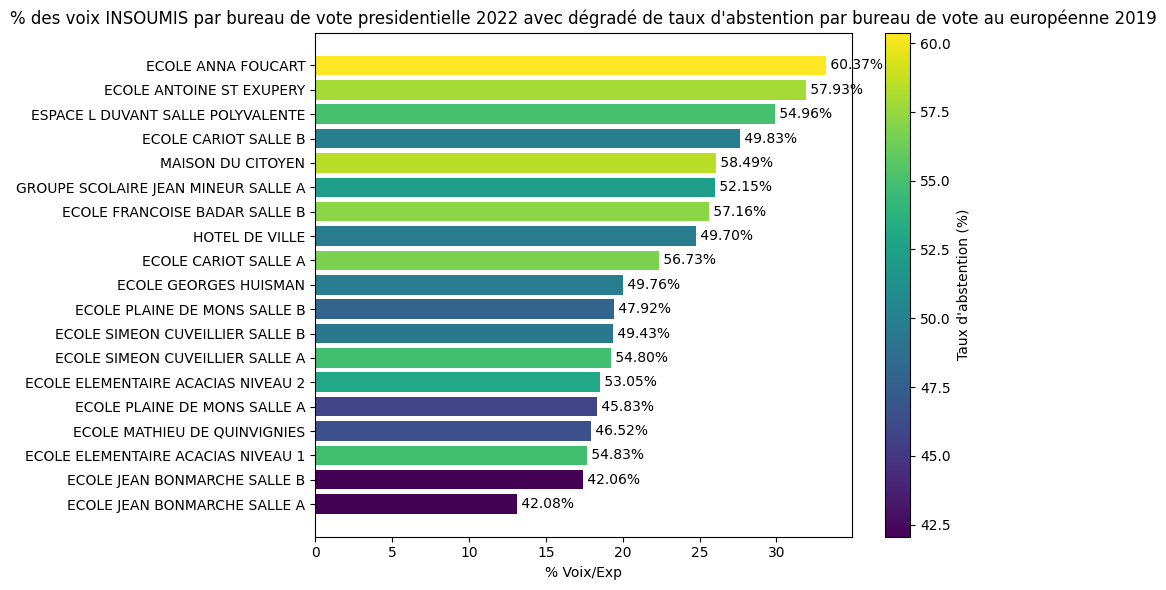

In [85]:


# Utilisation d'une colormap pour le dégradé de couleur basé sur 'Taux abstention'
colormap = plt.cm.viridis
normalize = plt.Normalize(vmin=df_sorted['Taux abstention'].min(), vmax=df_sorted['Taux abstention'].max())
colors = [colormap(normalize(value)) for value in df_sorted['Taux abstention']]

# Création du graphique à barres horizontales avec dégradé de couleur
plt.figure(figsize=(10, 6))
bars = plt.barh(df_sorted['lib_du_b_vote'], df_sorted['% Voix/Exp'], color=colors)

# Ajouter le taux d'abstention sur le graphique
for bar, taux in zip(bars, df_sorted['Taux abstention']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {taux:.2f}%', va='center', color='black')

# Création d'une colorbar pour indiquer la signification des couleurs
sm = plt.cm.ScalarMappable(cmap=colormap, norm=normalize)
sm.set_array([])
plt.colorbar(sm, label='Taux d\'abstention (%)')

plt.xlabel('% Voix/Exp')
plt.title('% des voix INSOUMIS par bureau de vote presidentielle 2022 avec dégradé de taux d\'abstention par bureau de vote au européenne 2019' )
plt.tight_layout()
plt.show()

In [82]:
df_sorted = df_sorted.sort_values(by='% Voix/Exp', ascending=True)

/var/folders/nh/yycxdg3j4zv38d785_zjzr0r0000gn/T/ipykernel_58392/3789767885.py:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Taux d\'abstention (%)')


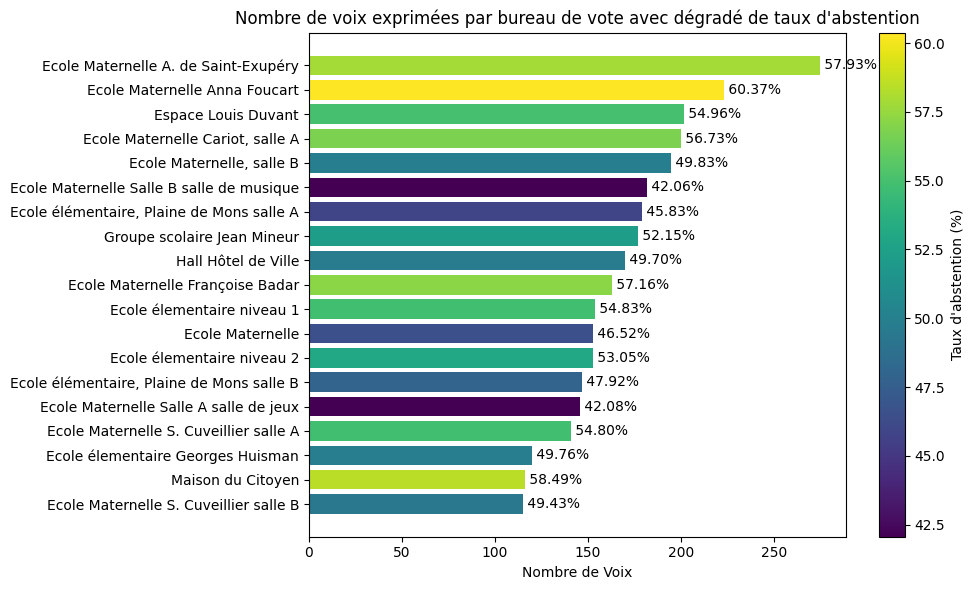

In [80]:

# Utilisation d'une colormap pour le dégradé de couleur basé sur 'Taux abstention'
colormap = plt.cm.viridis
normalize = plt.Normalize(vmin=df_sorted['Taux abstention'].min(), vmax=df_sorted['Taux abstention'].max())
colors = [colormap(normalize(value)) for value in df_sorted['Taux abstention']]

# Création du graphique à barres horizontales avec dégradé de couleur
plt.figure(figsize=(10, 6))
bars = plt.barh(df_sorted['Nom Bureau Vote'], df_sorted['Voix'], color=colors)

# Ajouter le taux d'abstention sur le graphique
for bar, taux in zip(bars, df_sorted['Taux abstention']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {taux:.2f}%', va='center', color='black')

# Création d'une colorbar pour indiquer la signification des couleurs
sm = plt.cm.ScalarMappable(cmap=colormap, norm=normalize)
sm.set_array([])
plt.colorbar(sm, label='Taux d\'abstention (%)')

plt.xlabel('Nombre de Voix')
plt.title('Nombre de voix exprimées par bureau de vote avec dégradé de taux d\'abstention')
plt.tight_layout()
plt.show()

In [1]:
def filtrer_liste_postes(postes):
    # Mots à exclure exactement
    exclusions_exactes = {
        "serveur",
        "équipier",
        "ingénieur",
        "ingenieur",
        "responsable",
        "généraliste",

    }
    # Liste des sous-chaînes à exclure dans n'importe quel mot
    exclusions_contenant = ["polyvalent", "bureau",""]

    # Filtrage
    postes_filtres = [
        poste
        for poste in postes
        if poste not in exclusions_exactes
        and not any(exclusion in poste for exclusion in exclusions_contenant)
    ]

    return postes_filtres

In [6]:
import re
def nettoyer_taches(taches):
    # Expression régulière pour identifier les mots à supprimer à la fin des tâches
    pattern = r"\s+(des|et|les|le|la|du|d\'un)$"

    def nettoyer_tache(tache):
        # Utilise l'expression régulière pour supprimer le mot spécifié à la fin de la tâche
        return re.sub(pattern, "", tache)

    # Applique la fonction de nettoyage à chaque tâche dans la liste
    taches_nettoyees = [nettoyer_tache(tache) for tache in taches]

    return taches_nettoyees

In [7]:
tache=[
  "gestion des équipements",
  "dimensionnement d’une",
  "amélioration d’un"
]

In [9]:
nettoyer_taches(tache)

['gestion des équipements', 'dimensionnement d’une', 'amélioration d’un']

In [11]:
import re

def nettoyer_taches(taches):
    # Expression régulière pour identifier les fins de phrases à supprimer
    pattern = r'\s+(des|et|les|le|la|du|d’une|d’un)$'

    def nettoyer_tache(tache):
        # Utilise l'expression régulière pour supprimer les fins spécifiées de la tâche
        tache_nettoyee = re.sub(pattern, '', tache)
        return tache_nettoyee

    # Applique la fonction de nettoyage à chaque tâche dans la liste
    taches_nettoyees = [nettoyer_tache(tache) for tache in taches]
    
    return taches_nettoyees

# Exemple d'utilisation de la fonction
taches = [
  "réduction de",
  "régression linéaire",
  "régression logistique",
  "simulation de variable aléatoire"
]

taches_nettoyees = nettoyer_taches(taches)
print(taches_nettoyees)

['réduction de', 'régression linéaire', 'régression logistique', 'simulation de variable aléatoire']


In [1]:
%pip install pyVinted

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

: 

In [1]:
def load_json_data(file_path):
    with open(file_path, "r") as file:
        data = json.load(file)
    return data


In [4]:
import json

In [5]:
load_json_data('job_analysis_results.json')

[{'soft_skills': ['exigeant',
   'dynamique',
   'travaillerez',
   "capacité d'écoute",
   'pugnace.',
   'patiente',
   'curieuxeuse',
   'esprit de synthèse',
   'dotée',
   "d'analyse",
   'visualisation',
   'personnalité',
   'motivation',
   "d'écoute",
   'process'],
  'hard_skills': ['brower', 'power', 'power bi', 'bi', 'snowflake', 'sql'],
  'ecole': ['supérieure', 'université', 'ecole', "ecole d'ingénieur."],
  'entreprises': ['Martin Brower',
   'Brower',
   'Martin',
   'Martin Brower France',
   'Département'],
  'diplome': ['bac+5'],
  'langue': [],
  'post': ['leader', 'leader', 'data analyst', 'analyst'],
  'nom_prenom': ['Martin'],
  'adresse': ['France', 'Lisses', '91'],
  'tache': ['collaborer avec les équipes opérationnelles',
   'constitution de votre dossier administratif',
   'améliorer et optimiser les rapports',
   'analytiques optimiser les rapports',
   "l'analyse de données besoins",
   "d'analyse de données ad-hoc",
   'modélisation de prévisions',
   'rép

In [6]:
%pip install geopy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

def get_location(address):
    geolocator = Nominatim(user_agent="geoapiExercises")
    location = geolocator.geocode(address)
    if location:
        return (location.latitude, location.longitude)
    else:
        return None

def calculate_distance(address1, address2):
    loc1 = get_location(address1)
    loc2 = get_location(address2)
    
    if not loc1 or not loc2:
        print("L'une des adresses n'a pas pu être géolocalisée.")
        return None

    # Calcul de la distance en kilomètres, converti en mètres
    distance = geodesic(loc1, loc2).meters
    return distance

# Exemple d'utilisation
address1 = "Tour Eiffel, Paris"
address2 = "Louvre, Paris"
distance = calculate_distance(address1, address2)
if distance is not None:
    print(f"La distance entre '{address1}' et '{address2}' est d'environ {distance:.2f} mètres.")


La distance entre 'Tour Eiffel, Paris' et 'Louvre, Paris' est d'environ 3209.99 mètres.


In [17]:
import requests
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

def get_location(address):
    geolocator = Nominatim(user_agent="geoapiExercises")
    location = geolocator.geocode(address)
    return (location.latitude, location.longitude) if location else None

def get_weather(latitude, longitude, api_key): 
    url = f"http://api.openweathermap.org/data/2.5/weather?lat={latitude}&lon={longitude}&appid={api_key}&units=metric"
    response = requests.get(url)
    data = response.json()
    return data

def main(address1, address2, api_key):
    loc1 = get_location(address1)
    loc2 = get_location(address2)
    
    if not loc1 or not loc2:
        print("L'une des adresses n'a pas pu être géolocalisée.")
        return

    # Obtenez les conditions météorologiques pour les deux endroits
    weather1 = get_weather(loc1[0], loc1[1], api_key)
    weather2 = get_weather(loc2[0], loc2[1], api_key)
    
    print(f"Météo à {address1}: {weather1['weather'][0]['description']}, Température: {weather1['main']['temp']} °C")
    print(f"Météo à {address2}: {weather2['weather'][0]['description']}, Température: {weather2['main']['temp']} °C")

# Utilisation
api_key = "4484ee2e35c72d480d8a0827e51a5a2a"
address1 = "Tour Eiffel, Paris"
address2 = "Louvre, Paris"
main(address1, address2, api_key)

Météo à Tour Eiffel, Paris: {'coord': {'lon': 2.2945, 'lat': 48.8583}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 12.95, 'feels_like': 11.92, 'temp_min': 12.25, 'temp_max': 14.29, 'pressure': 1004, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 190}, 'clouds': {'all': 0}, 'dt': 1714122135, 'sys': {'type': 2, 'id': 2012208, 'country': 'FR', 'sunrise': 1714106305, 'sunset': 1714157905}, 'timezone': 7200, 'id': 6545270, 'name': 'Palais-Royal', 'cod': 200}, Température: {'coord': {'lon': 2.2945, 'lat': 48.8583}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 12.95, 'feels_like': 11.92, 'temp_min': 12.25, 'temp_max': 14.29, 'pressure': 1004, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 190}, 'clouds': {'all': 0}, 'dt': 1714122135, 'sys': {'type': 2, 'id': 2012208, 'country': 'FR', 'sunrise': 17